# Fitting of the Upscaled and Extended Model of Capillary Rise to Data

**Please read the [README file](./README.md) first.**

In this file, the process of fitting and the visualization of the results is explained. This is in detail done for the upscaled model for [glycerol](#Glycerol), for the extended model for [Soltrol 170](#Soltrol), and just repeated for [purified water](#Water).

## ATTENTION

Note that the **data reported by [Heshmati and Piri (2014)](#References) is not included** due to legal restrictions (copyright). Instead, for demonstration purposes, the included data (`data/<fluid>_R<radius>mm.csv`) consists of samples produced from the fitted models.  
However all the fits (`data/<fluid>_R<radius>mm.fit`), the parameter data (`data/<fluid>_R<radius>mm_<modeltype>_<fittype><slip>.param`) and the summaries (`<fluid>_<modeltype>.csv`), which are reported in [Lunowa, Mascini, et al. (2021)](#References), are included.

## References

The software is based on the following publications:

* M. Heshmati, M. Piri, *Experimental investigation of dynamic contact angle and
  capillary rise in tubes with circular and noncircular cross sections*.
  Langmuir 30 (2014) 14151-14162.
  [DOI: 10.1021/la501724y](https://doi.org/10.1021/la501724y).
* S.B. Lunowa, C. Bringedal, I.S. Pop, *On an averaged model for immiscible
  two-phase flow with surface tension and dynamic contact angle in a thin strip*.
  Stud. Appl. Math. 147 (2021) 84-126.
  [DOI: 10.1111/sapm.12376](https://doi.org/10.1111/sapm.12376)
* S.B. Lunowa, A. Mascini, C. Bringedal, T. Bultreys, V. Cnudde, I.S. Pop,
  *Capillary Rise of Fluids in Cylindrical Tubes*.
  In preparation (2021).

## Initalization

First, all necessary components are imported. In particular, the modules `DataAnalysis` and `DataVisualization` include all routines for the data analysis (fitting + IO) and visualization (plotting).

Since the data reported by [Heshmati and Piri (2014)](#references) is not included, the fitting is not
recomputed (`do_fitting = False`), but the included fits are just plotted together with the sample data.
If you want to fit the sample data (`do_fitting = True`), **be aware that this might take several hours**.

To show the possibility to save the solution data for the fits of the extended model (e.g. for plotting in another program), it is **not included by default**. Include by setting `save_solutions_extended = True`. **Be aware that this might take some time as the detailed solution has to be recomputed**.

In [1]:
import numpy
from DataAnalysis import *
from DataVisualization import *
%matplotlib inline

#ignore irrelevant warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# set to True if the fitting should be (re)computed
do_fitting = False
# set to True if the fitted solution of the extended models should be saved
save_solutions_extended = False

## Glycerol

Note that the extended model is not used for glycerol. Hence, the results are not plotted and the solutions not saved. For more details on the steps for the extended model, see the section [Extended Model](#Extended-Model) for [Soltrol](#Soltrol).

### Loading the Data

After the possible fitting (`fit_and_save`), the resulting fits and parameters are loaded from the files
for this, one obtains the data set `data_g`, *see [ATTENTION](#ATTENTION)*, and the default parameters `parameters_g` for `glycerol` at the radii of the tubes `radii_g` (`read_data_set`). Note that this includes the automatic estimate of the static contact angle, whic is also printed.
Then, the fits are loaded (`load_fits`), which in case of glycerol only means that `parameters_upscaled_g` for the upscaled model is filled (while `parameters_extended_g` is empty). This data can now be used to generate the data and residuals from the (fitting) parameters (`add_all_data`) resulting in an extended `DataFrame data_g`, names of the added solutions `names_<modeltype>_g`, and `colors_<modeltype>_g` for plotting.

### Upscaled Model

Only the upscaled model is fitted for glycerol (`fit_and_save`). This model is given in nondimensional form by

$$ \left(\frac{8h}{1 + 4\lambda} + 2\eta\right) \partial_t h = 1 - h, \quad h(0) = 0, $$
which has the solution
$$ t = - \frac{8 h(t)}{1 + 4\lambda} - \frac{2 (1 + 4\lambda) \eta + 8}{1 + 4\lambda} \ln |1 - h(t)| .$$

Here $h(t)$ denotes the height over time, $\mathcal{I}$ is the inertial coefficient, while $\eta$ and $\lambda$ are the dynamic contact angle parameter and the slip length, which are fitted.

The results and residuals are plotted over time (`plot_results`). Note that the labels are `LW` for the classical Lucas-Washborn model (static contact angle), or `<modeltype>_<fittype><slip>`, where the `<modeltype>` is `U` for "upscaled" and `E` for "extended", the `<fittype>` is any of the three types of fitting (`h`: height, `ca` : cosine of contact angle, `b`: both). and `<slip>` shows, if the slip length was fitted (`1`) or kept fixed $\lambda = 0$ (`0`).

Finally, `analyze_eta` plots the dimensional parameter $\eta$ for all fits in three figures.

Static contact angle 6.63 degrees extracted from 24 values for glycerol.


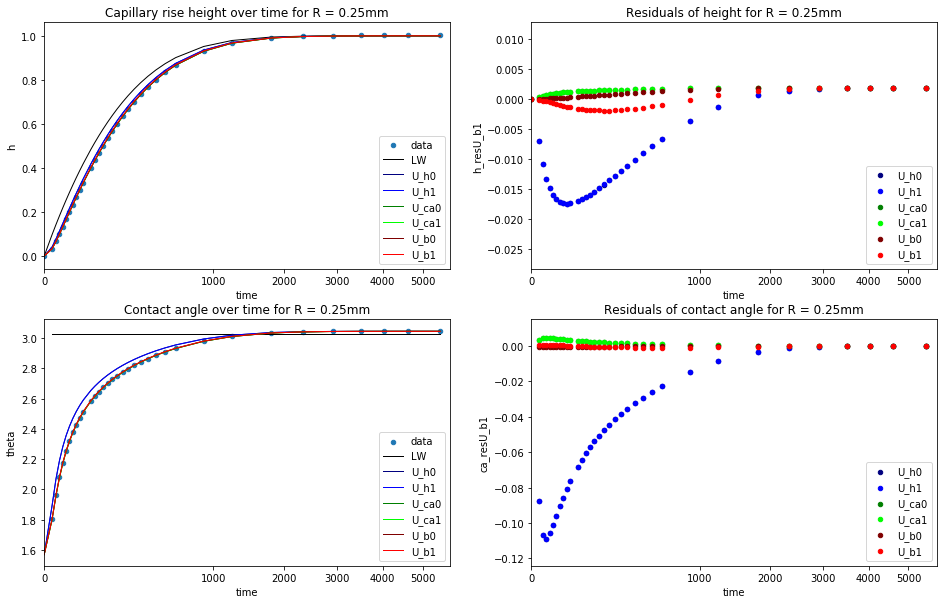

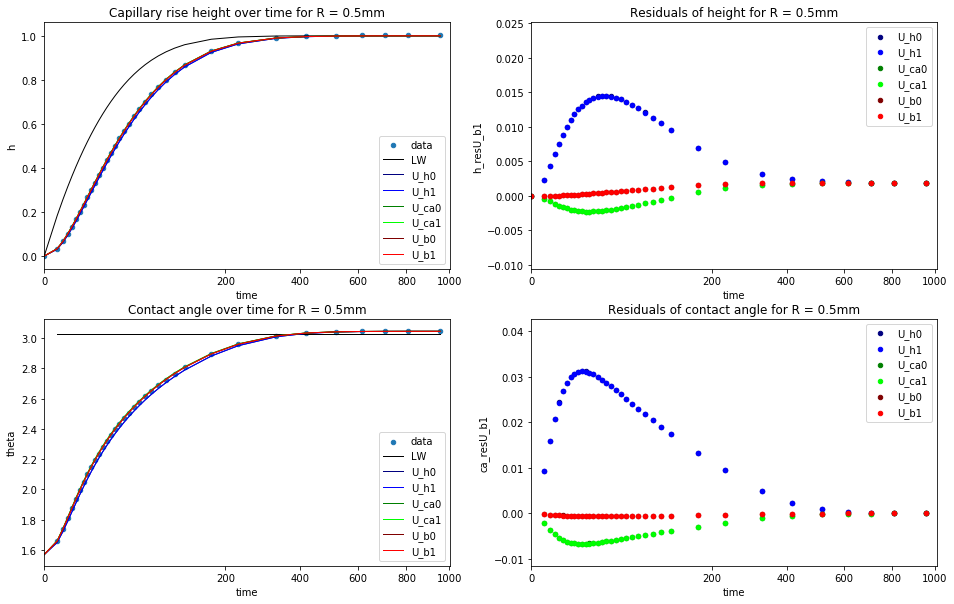

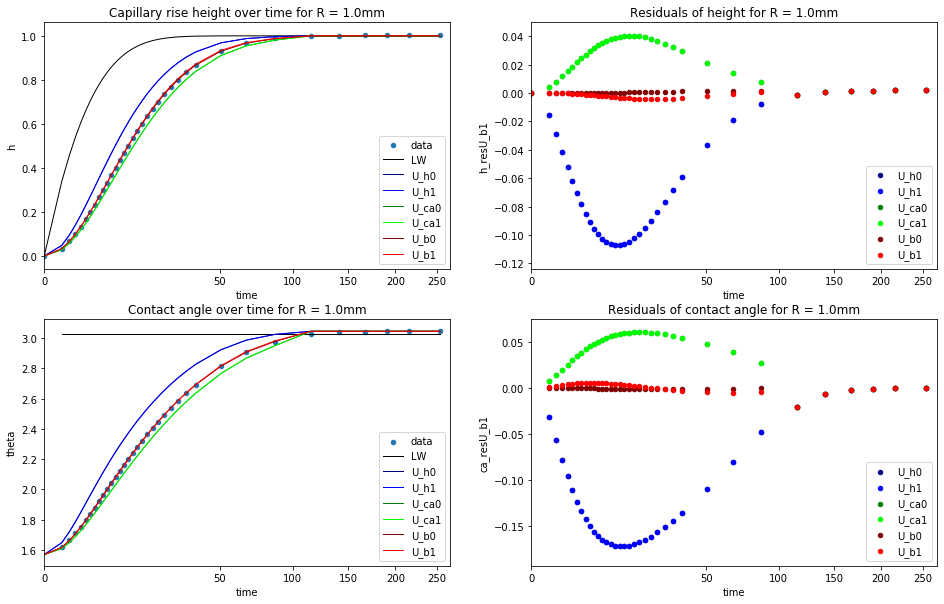

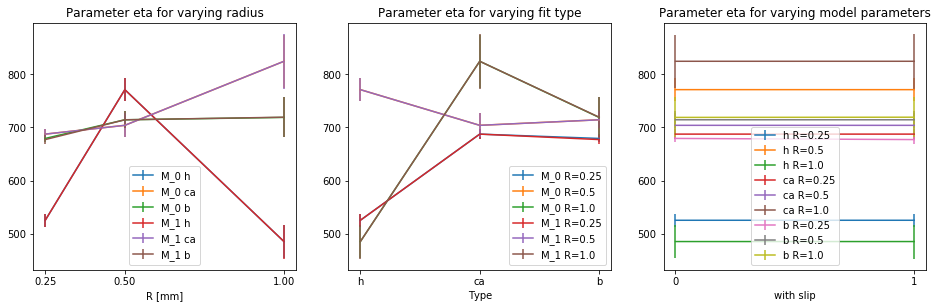

In [13]:
if do_fitting: fit_and_save("glycerol")

# load data
radii_g = [0.25, 0.5, 1.0] # radius [mm]
data_g, parameters_g = read_data_set("glycerol", radii_g)
parameters_upscaled_g, parameters_extended_g = load_fits("glycerol", radii_g)
data_g, names_ups_g, names_ext_g, colors_ups_g, colors_ext_g \
    = add_all_data(radii_g, parameters_g, data_g, parameters_upscaled_g, parameters_extended_g)

# visualize data of the upscaled model
plot_results(radii_g, data_g, names_ups_g, colors_ups_g)
analyze_eta(radii_g, parameters_upscaled_g) 

################################################################################
# nothing done here, as no extended model results are computed for glycerol 
################################################################################
# visualize data of the extended model (and save)
#plot_results(radii_g, data_g, names_ext_g, colors_ext_g)
#analyze_eta(radii_g, parameters_extended_g)
#if save_solutions_extended:
#    times = [];
#    for df in data_g:
#        t_min = numpy.min(df["t"][ df["t"] > 0.0 ]) / 1.5
#        t_max = numpy.max(df["t"][ df["t"] > 0.0 ]) * 1.5
#        times.append(numpy.append([0], numpy.geomspace(t_min, t_max, 300)))
#    save_fit_solutions("glycerol", radii_g, parameters_extended_g, times)
################################################################################

## Soltrol

For Soltrol 170, we repeat the steps as for [glycerol](#Glycerol). Here, we additionall restrict the non-dimensional fitting time $t$ (`fit_and_save`) to the interval $[0, t_{\max}=400]$ to avoid extremely long computation times without benefit as the reported data for $t > 400$ is already the stationary solution.

### Extended Model

Furthermore, the extended model is fitted for soltrol. This model is given in nondimensional form by

$$ \mathcal{I} \partial_t \big(h \partial_t h\big) + \left(\frac{8h}{1 + 4\lambda} + 2\eta\right) \partial_t h = 1 - h, \quad h(0) = 0, \quad \partial_t h(0) = \frac{\sqrt{\eta^2 + \mathcal{I}} - \eta}{\mathcal{I}}. $$

Here $h(t)$ denotes the height over time, $\mathcal{I}$ is the inertial coefficient, while $\eta$ and $\lambda$ are the dynamic contact angle parameter and the slip length, which are fitted.
The results are plotted and $\eta$ is analysed as for the upscaled model.

Finally, the data of the fitted solutions to the extended model are saved. For this, the times at which the solutions are evaluated are summarized in the list `times` using a geometric spacing (`numpy.geomspace`). Then, the `save_fit_solutions` method saves all solutions into the files `data/soltrol_R<radius>mm_ext.csv`. The fields of the csv file are `t` (dimensionless time), `h_<fittype>` (dimensionless height), `v_<fittype>` (the dimensionless velocity) and `ca_<fittype>` (the cosine of the contact angle measured in air). Here `<fittype>` is any of the three types of fitting (`h`: height, `ca` : cosine of contact angle, `b`: both).

Static contact angle 10.44 degrees extracted from 23 values for soltrol.


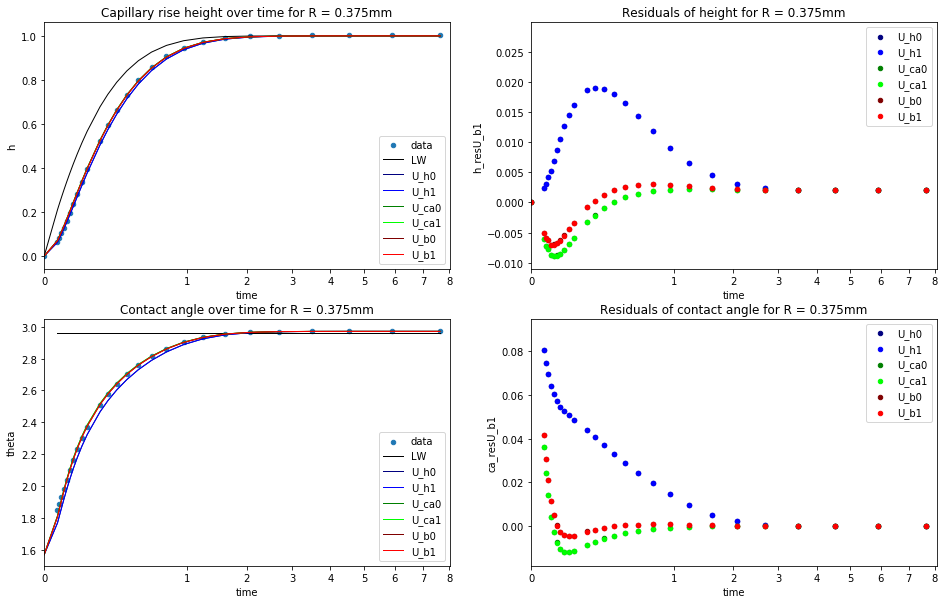

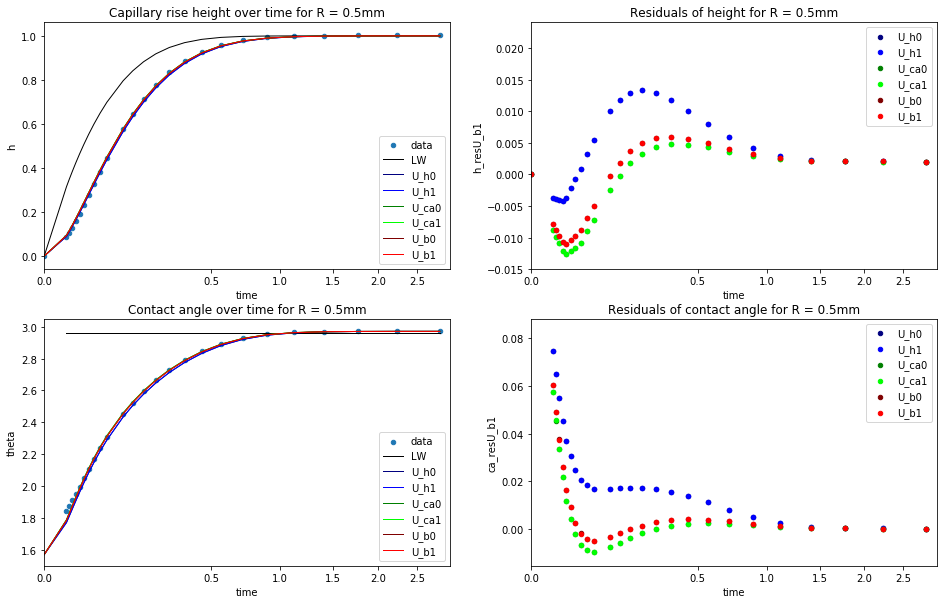

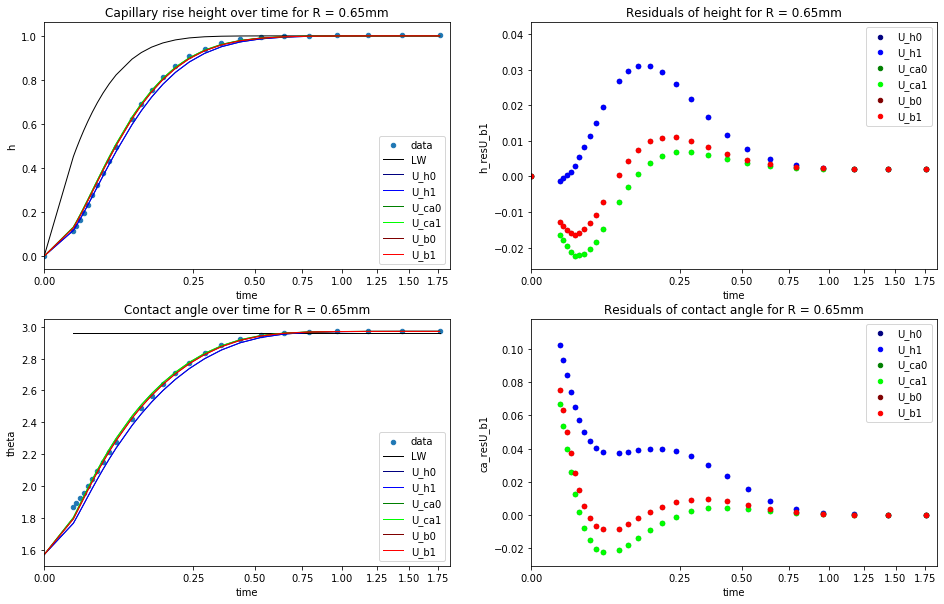

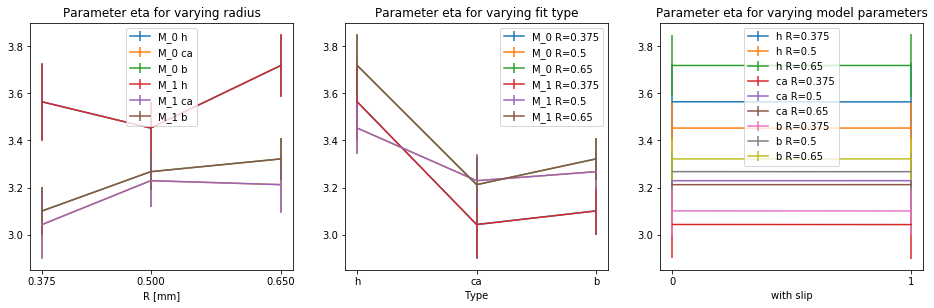

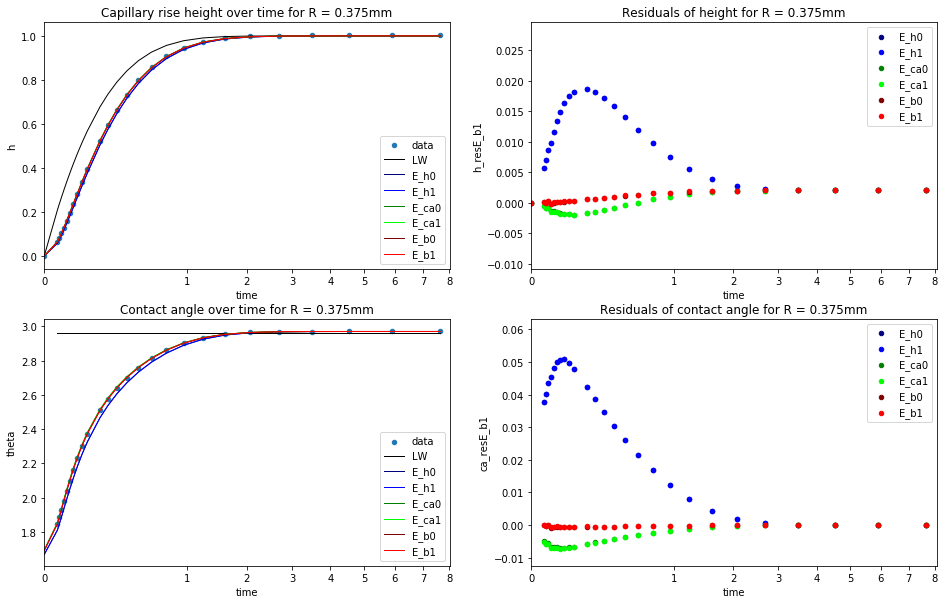

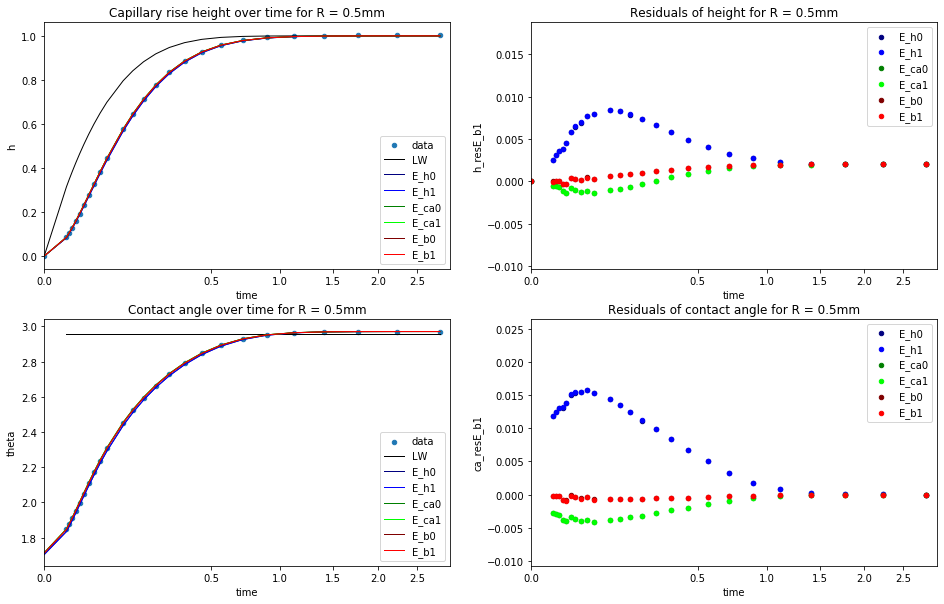

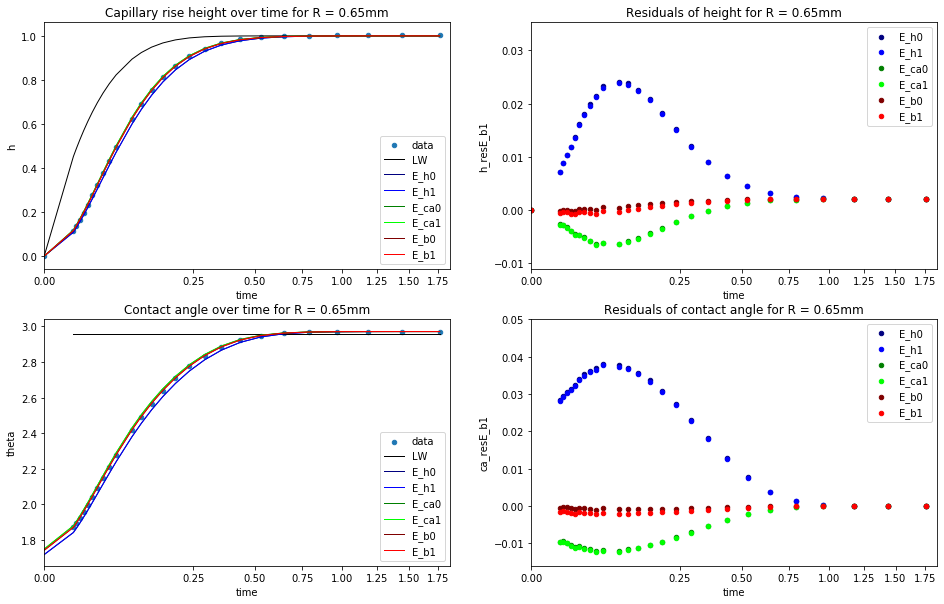

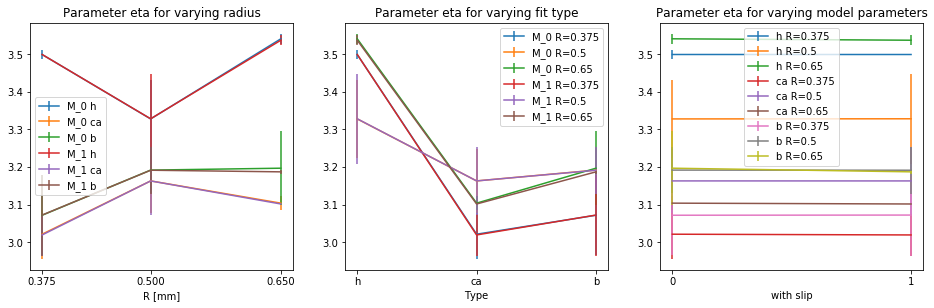

In [3]:
if do_fitting: fit_and_save("soltrol", {"t_max": 400})

# load data
radii_s = [0.375, 0.5, 0.65] # radius [mm]
data_s, parameters_s = read_data_set("soltrol", radii_s)
parameters_upscaled_s, parameters_extended_s = load_fits("soltrol", radii_s)
data_s, names_ups_s, names_ext_s, colors_ups_s, colors_ext_s \
    = add_all_data(radii_s, parameters_s, data_s, parameters_upscaled_s, parameters_extended_s, {"t_max": 400})

# visualize data of the upscaled model
plot_results(radii_s, data_s, names_ups_s, colors_ups_s)
analyze_eta(radii_s, parameters_upscaled_s)

# visualize data of the extended model (and save)
plot_results(radii_s, data_s, names_ext_s, colors_ext_s)
analyze_eta(radii_s, parameters_extended_s)
if save_solutions_extended:
    times = [];
    for df in data_s:
        t_min = numpy.min(df["t"][ df["t"] > 0.0 ]) / 3
        t_max = min(numpy.max(df["t"][ df["t"] > 0.0 ]) * 1.5, 400)
        times.append(numpy.append([0], numpy.geomspace(t_min, t_max, 300)))
    save_fit_solutions("soltrol", radii_s, parameters_extended_s, times)

## Water

For purified water, we just repeat the steps as for [Soltrol](#Soltrol) (without maximal fitting time).

Static contact angle 10.53 degrees extracted from 21 values for water.


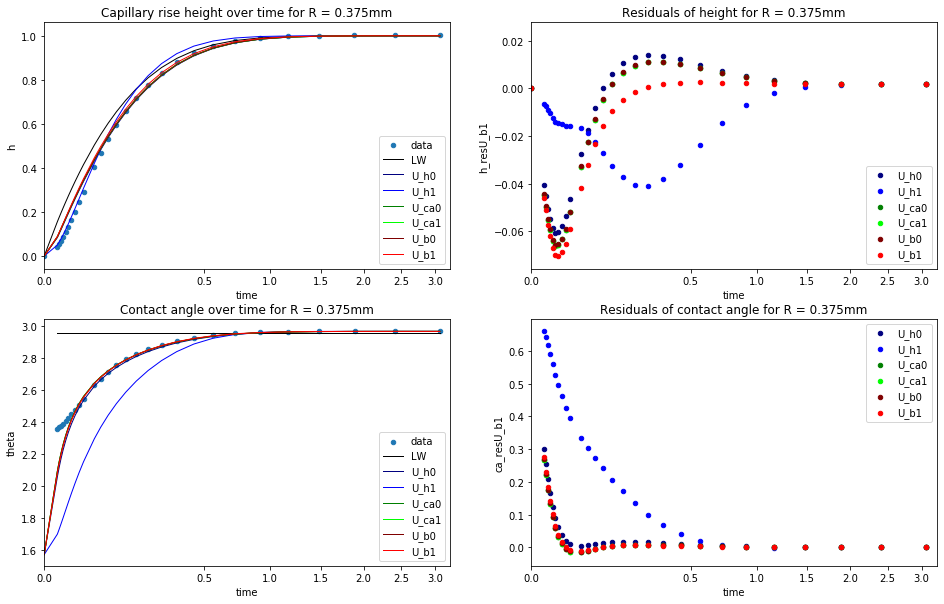

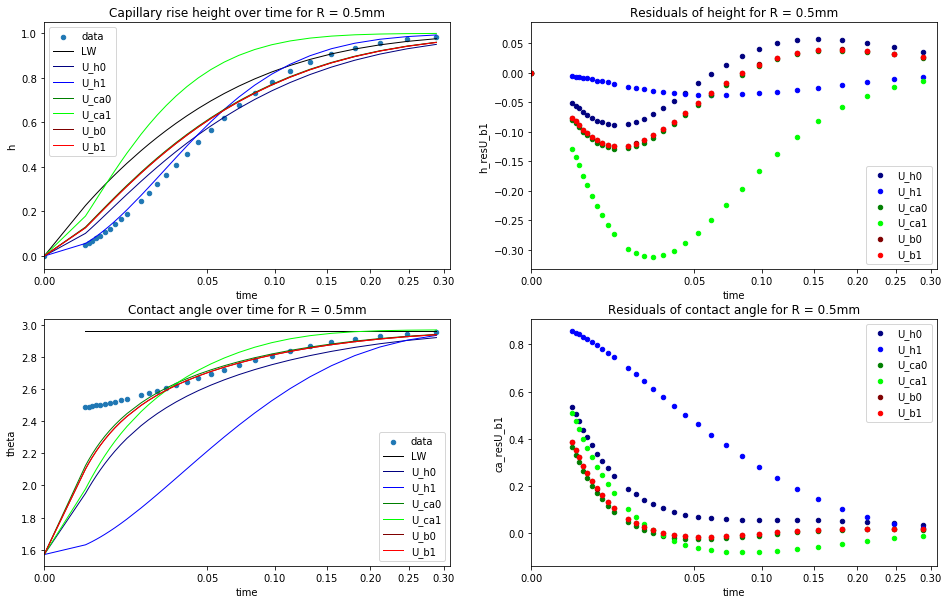

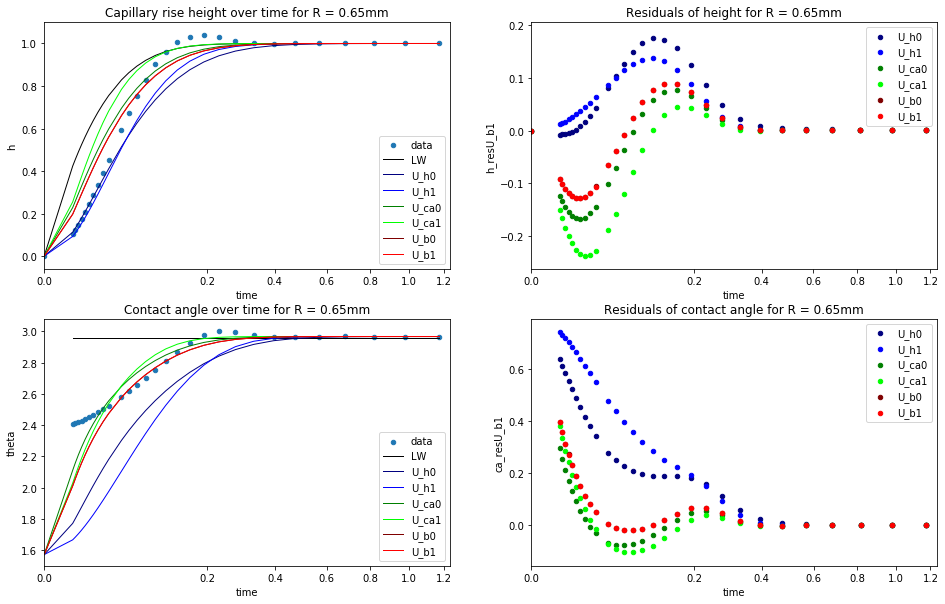

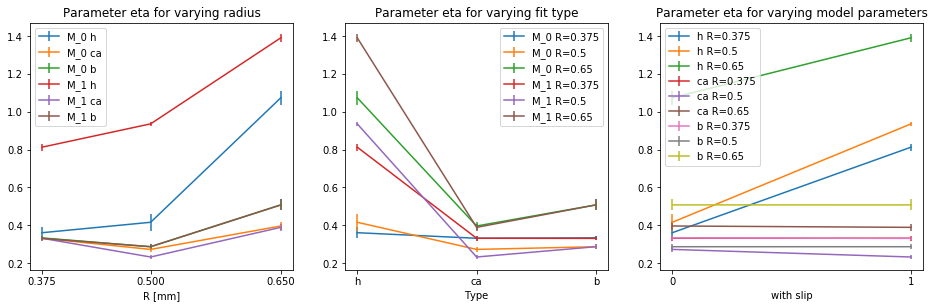

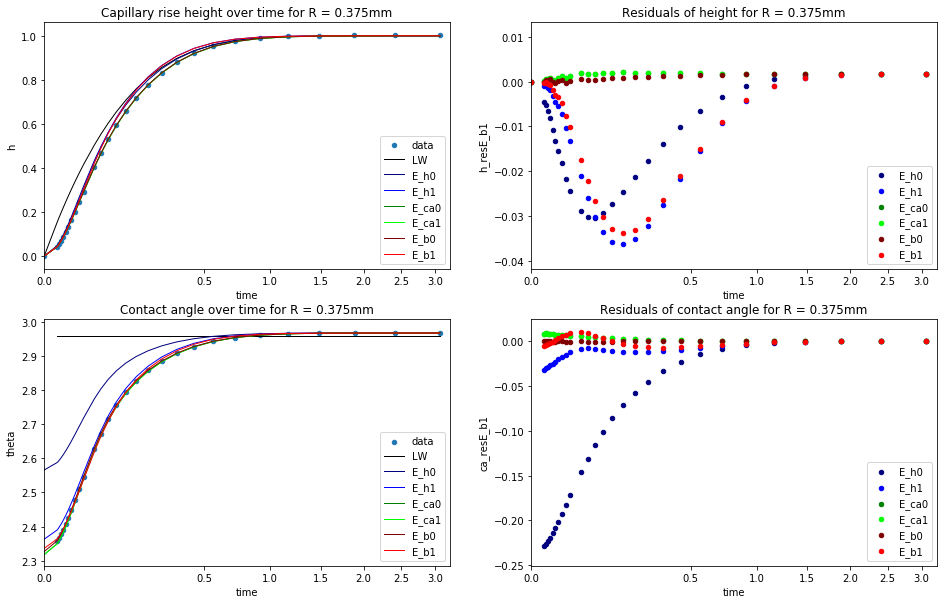

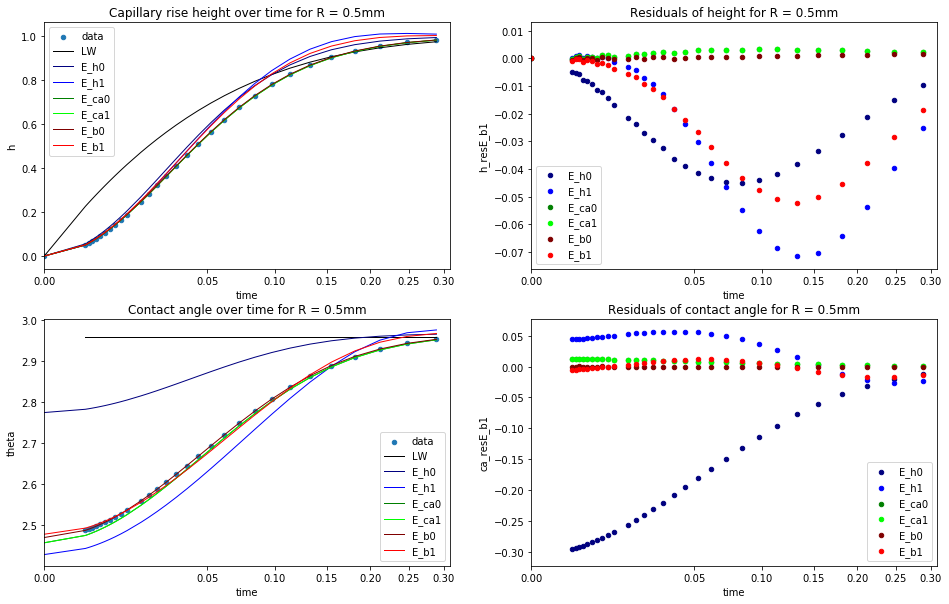

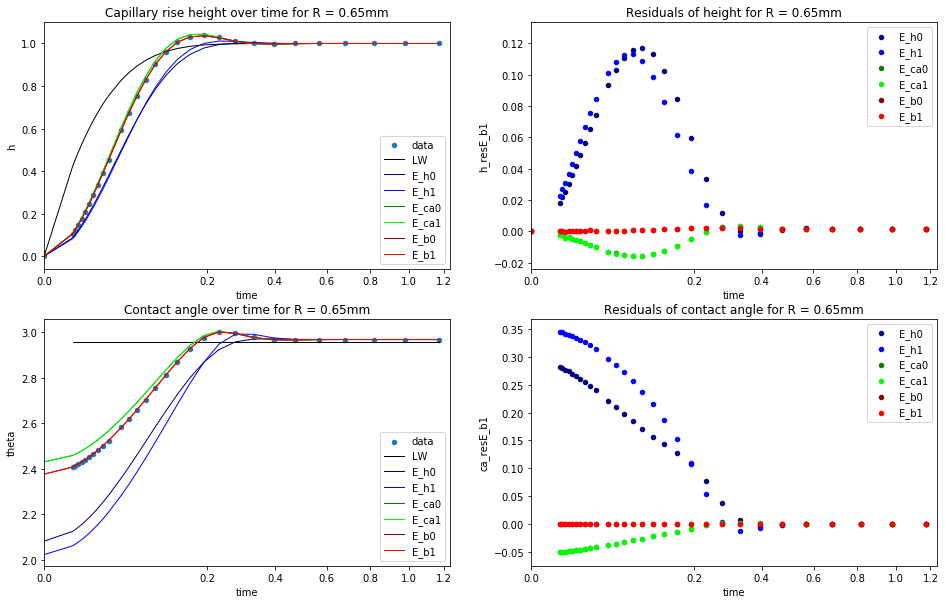

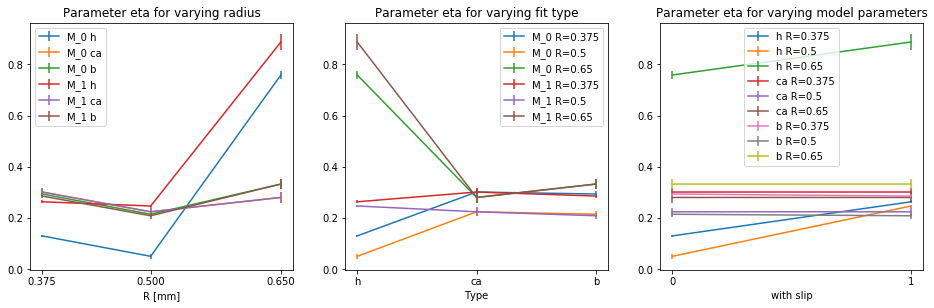

In [4]:
### WATER
if do_fitting: fit_and_save("water")

# load data
radii_w = [0.375, 0.5, 0.65] # radius [mm]
data_w, parameters_w = read_data_set("water", radii_w)
parameters_upscaled_w, parameters_extended_w = load_fits("water", radii_w)
data_w, names_ups_w, names_ext_w, colors_ups_w, colors_ext_w \
    = add_all_data(radii_w, parameters_w, data_w, parameters_upscaled_w, parameters_extended_w)

# visualize data of the upscaled model
plot_results(radii_w, data_w, names_ups_w, colors_ups_w)
analyze_eta(radii_w, parameters_upscaled_w)

# visualize data of the extended model (and save)
plot_results(radii_w, data_w, names_ext_w, colors_ext_w)
analyze_eta(radii_w, parameters_extended_w)
if save_solutions_extended:
    times = [];
    for df in data_w:
        t_min = numpy.min(df["t"][ df["t"] > 0.0 ]) / 3
        t_max = numpy.max(df["t"][ df["t"] > 0.0 ]) * 1.5
        times.append(numpy.append([0], numpy.geomspace(t_min, t_max, 300)))
    save_fit_solutions("water", radii_w, parameters_extended_w, times)

[(To the top)](#Fitting-of-the-Upscaled-and-Extended-Model-of-Capillary-Rise-to-Data)